<a href="https://colab.research.google.com/github/dhanarajappu456/new/blob/main/RNA_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing important modules

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.preprocessing import StandardScaler
from  sklearn.decomposition import PCA

In [3]:
data=pd.read_csv('/content/drive/MyDrive/CANCER/data.csv',index_col=[0]) # here we make first col of data as index col of the data 



In [4]:
data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_20491,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.000000,0.0,0.000000,0.000000,0.591871,5.619994,1.334282,0.000000,9.796088,0.0,0.000000,1.598651,7.215116,10.839070,6.620204,9.513538,0.000000,4.063658,7.764805,4.747656,13.714396,10.034496,0.000000,0.000000,9.833458,0.000000,...,9.370304,10.362393,5.589928,8.141964,0.000000,2.736583,7.037152,7.123480,10.967399,5.902800,3.719370,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.000000,8.469593,0.000000,6.535978,6.968701,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.000000,0.0,0.000000,0.000000,0.000000,11.055208,3.562621,0.000000,10.070470,0.0,0.000000,0.000000,9.949812,8.522476,1.174790,4.926991,0.000000,0.000000,5.819832,1.327170,13.286240,6.663316,0.587845,0.000000,9.533302,0.811142,...,8.882967,9.898199,7.069401,7.186134,0.000000,3.134993,6.648930,6.715701,9.536238,1.004394,5.555482,8.029260,6.366219,0.811142,7.991732,7.161001,0.000000,4.708877,0.811142,8.451689,0.000000,7.242336,8.046284,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.000000,0.0,0.000000,0.000000,1.683023,8.210248,4.195285,3.660427,8.970920,0.0,0.000000,0.796598,6.096650,9.861616,7.680507,3.119439,0.000000,0.452595,7.899526,0.000000,10.731098,6.967883,0.452595,0.000000,9.646323,0.452595,...,10.355637,10.423274,5.170201,6.194260,0.000000,3.677147,6.271990,7.089816,9.675220,0.000000,4.224017,8.020402,6.967883,5.014445,8.400038,7.527555,0.000000,4.997902,0.796598,7.761132,0.000000,6.820460,8.048983,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.000000,0.0,0.000000,0.000000,1.267356,8.306317,3.573556,0.000000,8.524616,0.0,0.000000,0.000000,3.913761,9.511573,6.469165,7.029895,0.000000,1.267356,6.800641,7.742714,12.659474,8.299890,0.768587,0.000000,9.670731,0.434882,...,10.074382,9.918261,7.117924,7.196145,0.434882,3.609755,8.896696,7.577096,10.731446,5.075383,2.175652,7.675435,6.840816,6.233192,8.899886,8.319085,1.791814,5.661134,1.464093,8.625727,0.000000,7.420095,7.784746,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.000000,0.0,0.000000,0.000000,0.889707,10.149150,2.967630,0.000000,8.047238,0.0,1.435949,0.000000,1.942120,8.821535,5.861429,7.755709,0.000000,0.649386,5.570241,2.612801,13.556734,8.004754,0.000000,0.000000,9.587569,0.649386,...,10.129154,10.062303,6.911620,7.855149,0.360982,3.655810,7.25552

In [5]:
labels=pd.read_csv('/content/drive/MyDrive/CANCER/labels.csv',index_col=[0]) # here we make first col of label as its index col
labels

,Class
sample_0,PRAD
sample_1,LUAD
sample_2,PRAD
sample_3,PRAD
sample_4,BRCA
...,...
sample_796,BRCA
sample_797,LUAD
sample_798,COAD
sample_799,PRAD


# Explore the dataset

In [6]:
#exploring dataset

data_count10=data.head(10)
labels_count10=labels.head(10)
print(data,labels)


            gene_0    gene_1    gene_2  ...  gene_20528  gene_20529  gene_20530
sample_0       0.0  2.017209  3.265527  ...    8.921326    5.286759    0.000000
sample_1       0.0  0.592732  1.588421  ...    9.397854    2.094168    0.000000
sample_2       0.0  3.511759  4.327199  ...   10.090470    1.683023    0.000000
sample_3       0.0  3.663618  4.507649  ...    9.684365    3.292001    0.000000
sample_4       0.0  2.655741  2.821547  ...    9.461191    5.110372    0.000000
...            ...       ...       ...  ...         ...         ...         ...
sample_796     0.0  1.865642  2.718197  ...   10.092770    8.819269    0.000000
sample_797     0.0  3.942955  4.453807  ...    8.745983    9.659081    0.000000
sample_798     0.0  3.249582  3.707492  ...    9.466711    4.677458    0.586693
sample_799     0.0  2.590339  2.787976  ...   10.400581    5.718751    0.000000
sample_800     0.0  2.325242  3.805932  ...    9.844794    4.550716    0.000000

[801 rows x 20531 columns]            C

# label description

In [7]:
#label description

descriptor=labels.describe()
print(descriptor)
#unique cancer class

unique_class=labels['Class'].unique().tolist()
print(unique_class)

       Class
count    801
unique     5
top     BRCA
freq     300
['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD']


# Combine data and labels to one dataframe

In [8]:
clubbed_data=pd.concat([data,labels],axis=1)
clubbed_data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,gene_11,gene_12,gene_13,gene_14,gene_15,gene_16,gene_17,gene_18,gene_19,gene_20,gene_21,gene_22,gene_23,gene_24,gene_25,gene_26,gene_27,gene_28,gene_29,gene_30,gene_31,gene_32,gene_33,gene_34,gene_35,gene_36,gene_37,gene_38,gene_39,...,gene_20492,gene_20493,gene_20494,gene_20495,gene_20496,gene_20497,gene_20498,gene_20499,gene_20500,gene_20501,gene_20502,gene_20503,gene_20504,gene_20505,gene_20506,gene_20507,gene_20508,gene_20509,gene_20510,gene_20511,gene_20512,gene_20513,gene_20514,gene_20515,gene_20516,gene_20517,gene_20518,gene_20519,gene_20520,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,0.591871,1.334282,2.015391,0.591871,0.000000,0.0,0.000000,0.000000,0.591871,5.619994,1.334282,0.000000,9.796088,0.0,0.000000,1.598651,7.215116,10.839070,6.620204,9.513538,0.000000,4.063658,7.764805,4.747656,13.714396,10.034496,0.000000,0.000000,9.833458,0.000000,...,10.362393,5.589928,8.141964,0.000000,2.736583,7.037152,7.123480,10.967399,5.902800,3.719370,7.203554,6.042557,2.602077,7.425526,7.846957,2.824951,6.239396,0.000000,8.469593,0.000000,6.535978,6.968701,7.128881,7.175175,9.249369,7.025970,8.045563,7.475709,7.205236,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000,PRAD
sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,0.000000,0.587845,2.466601,1.004394,0.000000,0.0,0.000000,0.000000,0.000000,11.055208,3.562621,0.000000,10.070470,0.0,0.000000,0.000000,9.949812,8.522476,1.174790,4.926991,0.000000,0.000000,5.819832,1.327170,13.286240,6.663316,0.587845,0.000000,9.533302,0.811142,...,9.898199,7.069401,7.186134,0.000000,3.134993,6.648930,6.715701,9.536238,1.004394,5.555482,8.029260,6.366219,0.811142,7.991732,7.161001,0.000000,4.708877,0.811142,8.451689,0.000000,7.242336,8.046284,6.047558,8.572901,7.549030,7.019935,9.458940,9.190867,10.639259,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000,LUAD
sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,0.000000,0.452595,1.981122,1.074163,0.000000,0.0,0.000000,0.000000,1.683023,8.210248,4.195285,3.660427,8.970920,0.0,0.000000,0.796598,6.096650,9.861616,7.680507,3.119439,0.000000,0.452595,7.899526,0.000000,10.731098,6.967883,0.452595,0.000000,9.646323,0.452595,...,10.423274,5.170201,6.194260,0.000000,3.677147,6.271990,7.089816,9.675220,0.000000,4.224017,8.020402,6.967883,5.014445,8.400038,7.527555,0.000000,4.997902,0.796598,7.761132,0.000000,6.820460,8.048983,6.661493,7.716332,6.745802,7.524667,8.602350,9.036654,10.336027,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000,PRAD
sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,0.000000,0.434882,2.874246,0.000000,0.000000,0.0,0.000000,0.000000,1.267356,8.306317,3.573556,0.000000,8.524616,0.0,0.000000,0.000000,3.913761,9.511573,6.469165,7.029895,0.000000,1.267356,6.800641,7.742714,12.659474,8.299890,0.768587,0.000000,9.670731,0.434882,...,9.918261,7.117924,7.196145,0.434882,3.609755,8.896696,7.577096,10.731446,5.075383,2.175652,7.675435,6.840816,6.233192,8.899886,8.319085,1.791814,5.661134,1.464093,8.625727,0.000000,7.420095,7.784746,7.613915,8.963286,7.744699,7.924997,8.981473,8.665592,9.194823,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000,PRAD
sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,0.000000,1.275841,2.141204,0.000000,0.000000,0.0,0.000000,0.000000,0.889707,10.149150,2.967630,0.000000,8.047238,0.0,1.435949,0.000000,1.942120,8.821535,5.861429,7.755709,0.000000,0.649386,5.570241,2.612801,13.556734,8.004754,0.000000,0.000000,9.587569,0.649386,...,10.062303,6.911620,7.855149,0.360982,3.655810,7.255520,7.292607,10.779793,3.954001,6.9

# lets sort the records based on the cancertypes as the index values

In [10]:
transformed=clubbed_data.set_index('Class').sort_index()

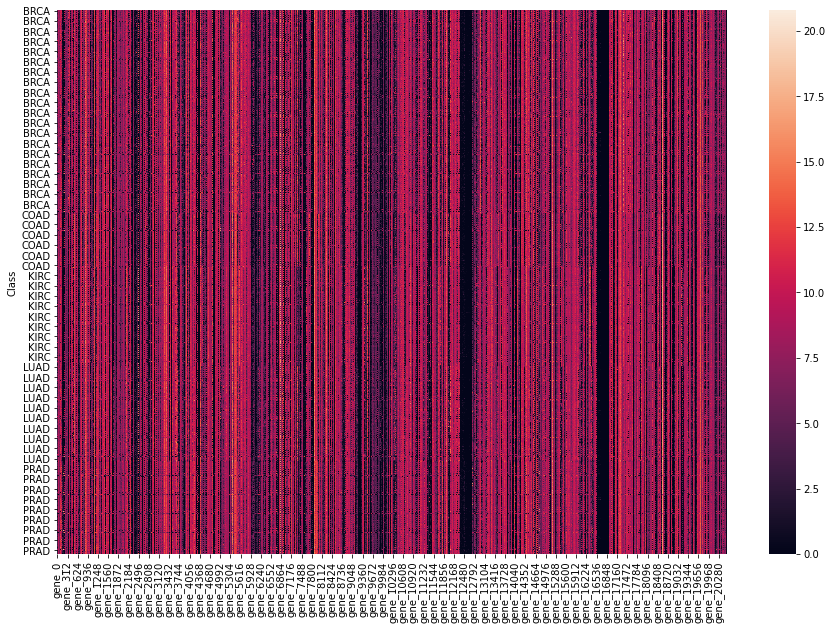

In [11]:
fig,ax=plt.subplots(figsize=(15,10))
#print(fig,ax)
sns.heatmap(transformed)


# let's see how many records of each types we have

In [12]:
transformed.index.value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

# perform necessary datapreprocessing



In [13]:
#check for nulls

arr=transformed.isnull().values.any()
arr

False

# Reducing the dimension

Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning.
High dimensionality means that the dataset has a large number of features. The primary problem associated with high-dimensionality in the machine learning field is model overfitting, which reduces the ability to generalize beyond the examples in the training set. Richard Bellman described this phenomenon in 1961 as the Curse of Dimensionality where “Many algorithms that work fine in low dimensions become intractable when the input is high-dimensional. “

source
The ability to generalize correctly becomes exponentially harder as the dimensionality of the training dataset grows, as the training set covers a dwindling fraction of the input space. Models also become more efficient as the reduced feature set boosts learning rates and diminishes computation costs by removing redundant features.
PCA can also be used to filter noisy datasets, such as image compression. The first principal component expresses the most amount of variance. Each additional component expresses less variance and more noise, so representing the data with a smaller subset of principal components preserves the signal and discards the noise.

# Dataset(input transformation, drop index)

In [14]:
x=transformed.reset_index(drop=True)
y=labels.reset_index(drop=True)
print(x)
print(y)

     gene_0    gene_1    gene_2  ...  gene_20528  gene_20529  gene_20530
0       0.0  3.801873  5.025591  ...    9.949412    5.980037    0.000000
1       0.0  3.277330  2.629846  ...    9.909158    5.494595    0.000000
2       0.0  1.149975  0.462576  ...    9.574616    3.541862    0.000000
3       0.0  4.538159  3.955722  ...   10.513451    6.729131    0.270828
4       0.0  2.599770  2.562792  ...    9.091528    9.356654    0.000000
..      ...       ...       ...  ...         ...         ...         ...
796     0.0  3.190172  3.520573  ...    9.584258    6.867711    0.353549
797     0.0  3.930822  4.049578  ...   10.210075    5.520705    0.000000
798     0.0  2.676809  3.955629  ...   10.355120    3.525868    0.000000
799     0.0  1.282262  2.998683  ...    9.582573    5.928617    0.000000
800     0.0  2.325242  3.805932  ...    9.844794    4.550716    0.000000

[801 rows x 20531 columns]
    Class
0    PRAD
1    LUAD
2    PRAD
3    PRAD
4    BRCA
..    ...
796  BRCA
797  LUAD
798  C

# prior to applying PCA, values must be scaled ,here we use standardscaler  

In [23]:
#Rescale dataframe

x_scaled=StandardScaler().fit_transform(x)
print(x_scaled)

[[-0.19479935  0.65909322  1.81254278 ...  0.63653548  0.21801981
  -0.26190144]
 [-0.19479935  0.22200286 -0.43711886 ...  0.56509892 -0.01620305
  -0.26190144]
 [-0.19479935 -1.55067859 -2.47223712 ... -0.02858939 -0.95838526
  -0.26190144]
 ...
 [-0.19479935 -0.27839906  0.80782267 ...  1.3565165  -0.96610193
  -0.26190144]
 [-0.19479935 -1.44044641 -0.09077239 ... -0.01446917  0.19320994
  -0.26190144]
 [-0.19479935 -0.57135218  0.66725377 ...  0.45087581 -0.47161901
  -0.26190144]]


*applying* PCA

In [25]:

pca = PCA(n_components=2)   #20531 features to 2 features
x_pca = pca.fit_transform(x)
x_pca.shape
print(x_pca)

[[ -3.57857109 -30.45278063]
 [ 20.33936659 -38.39114835]
 [ -3.56623999 -72.44490983]
 ...
 [-15.14914257 -24.33430296]
 [ -9.24254678  35.5650132 ]
 [-22.34455671   4.05235617]]


scatter plotting the inputs in the new dimension to see how they are correlated with the 2 dimension



ValueError: ignored

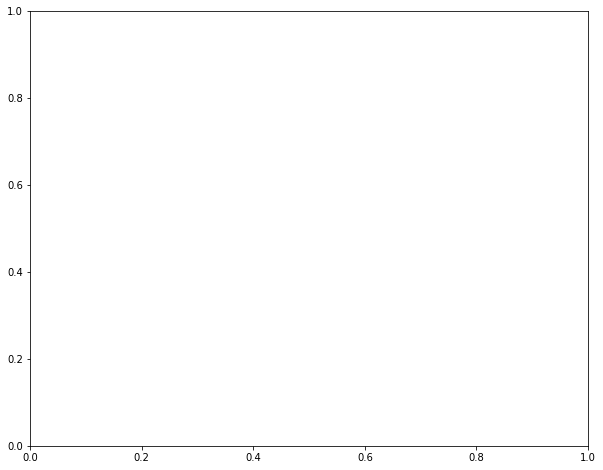

In [31]:
plt.figure(figsize=(10,8))
map=plt.scatter(x_pca[:,0],x_pca[:,1],c=y)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')